# Differences over $\alpha$

How do our allocations change over different $\alpha$?


In [1]:
import sys

# add library to path (or else, src not visible)
sys.path.insert(0, "../../")

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.AllocationSolver import AllocationSolver, State
from src.metrics import social_welfare_relative
from src.dists import SymmetricDiscreteDistribution, Distribution, UniformDistribution
from src.plots import plot_x_versus_d, plot_against_alpha

# use seaborn style plotting for poster presentation
sns.set_context("talk")
sns.set_style("whitegrid")

In [2]:
alpha_0 = social_welfare_relative(0)
alpha_1 = social_welfare_relative(1)
alpha_inf = social_welfare_relative(np.inf)

We now try varying $d_i$.

/var/folders/z8/vqz3gnrj5xz0_b1pd775nrlm0000gn/T/ipykernel_32326/2112841900.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_0[i] = alpha_0(allocs[np.newaxis, :], demands[np.newaxis, :])
/var/folders/z8/vqz3gnrj5xz0_b1pd775nrlm0000gn/T/ipykernel_32326/2112841900.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_1[i] = alpha_1(allocs[np.newaxis, :], demands[np.newaxis, :])
/var/folders/z8/vqz3gnrj5xz0_b1pd775nrlm0000gn/T/ipykernel_32326/2112841900.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performi

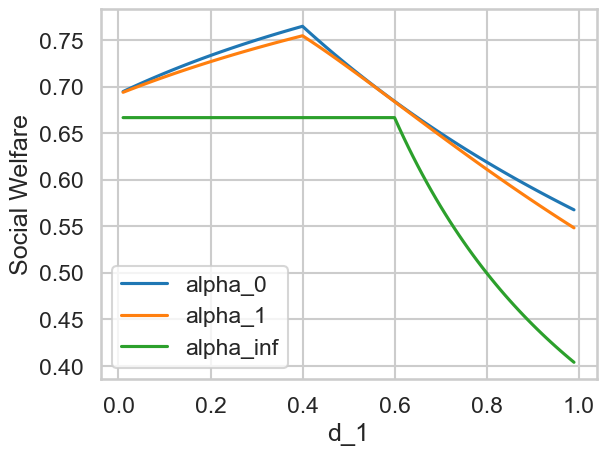

In [3]:
d_1 = np.arange(0.01, 1, 0.01)
d_2 = 0.7
d_3 = 0.6
x_1 = 0.4
x_2 = 0.5
x_3 = 0.4

a_0 = np.zeros_like(d_1)
a_1 = np.zeros_like(d_1)
a_inf = np.zeros_like(d_1)

for i, d_1_val in enumerate(d_1):
    allocs = np.array([min(d_1_val, x_1), min(d_2, x_2), min(d_3, x_3)])
    demands = np.array([d_1_val, d_2, d_3])
    a_0[i] = alpha_0(allocs[np.newaxis, :], demands[np.newaxis, :])
    a_1[i] = alpha_1(allocs[np.newaxis, :], demands[np.newaxis, :])
    a_inf[i] = alpha_inf(allocs[np.newaxis, :], demands[np.newaxis, :])

plt.plot(d_1, a_0, label="alpha_0")
plt.plot(d_1, a_1, label="alpha_1")
plt.plot(d_1, a_inf, label="alpha_inf")
plt.xlabel("d_1")
plt.ylabel("Social Welfare")
plt.legend()

We now try varying $x_1$.

/var/folders/z8/vqz3gnrj5xz0_b1pd775nrlm0000gn/T/ipykernel_32326/294959507.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_0[i] = alpha_0(allocs[np.newaxis, :], demands[np.newaxis, :])
/var/folders/z8/vqz3gnrj5xz0_b1pd775nrlm0000gn/T/ipykernel_32326/294959507.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_1[i] = alpha_1(allocs[np.newaxis, :], demands[np.newaxis, :])
/var/folders/z8/vqz3gnrj5xz0_b1pd775nrlm0000gn/T/ipykernel_32326/294959507.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing 

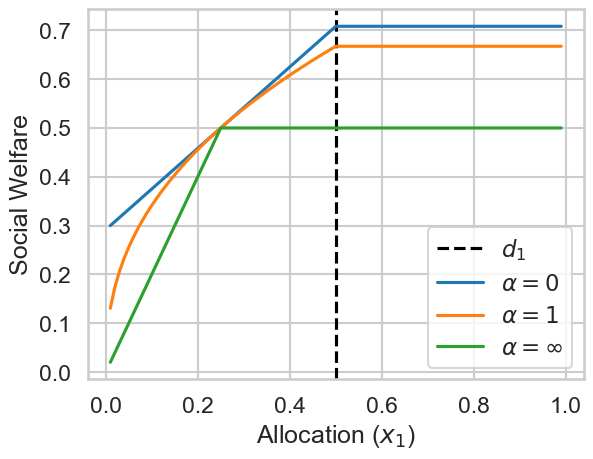

In [14]:
d_1 = 0.5
d_2 = 0.7
x_1 = np.arange(0.01, 1, 0.01)
x_2 = 0.35

a_0 = np.zeros_like(x_1)
a_1 = np.zeros_like(x_1)
a_inf = np.zeros_like(x_1)

for i, x_1_val in enumerate(x_1):
    allocs = np.array([x_1_val, x_2])
    demands = np.array([d_1, d_2])
    a_0[i] = alpha_0(allocs[np.newaxis, :], demands[np.newaxis, :])
    a_1[i] = alpha_1(allocs[np.newaxis, :], demands[np.newaxis, :])
    a_inf[i] = alpha_inf(allocs[np.newaxis, :], demands[np.newaxis, :])

plt.figure()

# vertical line at d_1, label as d_1
plt.axvline(d_1, color="black", linestyle="--", label=r"$d_1$")

# label with LaTex
plt.plot(x_1, a_0, label=r"$\alpha=0$")
plt.plot(x_1, a_1, label=r"$\alpha=1$")
plt.plot(x_1, a_inf, label=r"$\alpha=\infty$")
plt.xlabel(r"Allocation ($x_1$)")
plt.ylabel("Social Welfare")
plt.legend()
plt.show()


In [5]:
prob = AllocationSolver([Distribution((2, 3), (0.5, 0.5)),
                         Distribution((1, 4), (0.5, 0.5))],
                         1,
                         alloc_step=0.0005,
                         alpha=np.inf,
                         verbosity=2)
prob.solve()


array([0.18228125, 0.        ])

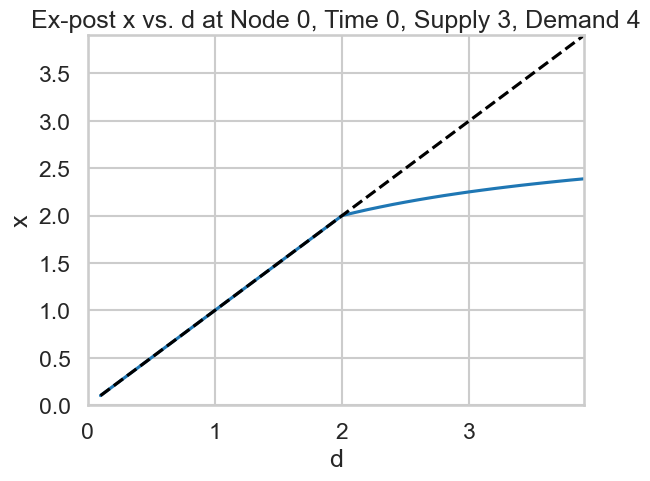

In [6]:
plot_x_versus_d(prob, 0, State(3, 4), 0.1)

In [7]:
prob.change_alpha(np.inf)
prob.solve()

array([0.18228125, 0.        ])

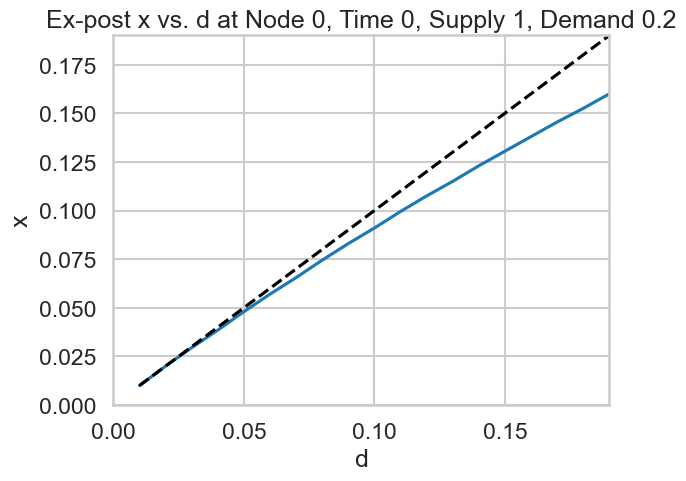

In [8]:
plot_x_versus_d(prob, 0, State(1, 0.2), 0.01)

In [9]:
# t = 0
# c = 1.5
# d = 2
# step = 0.01


# def x_versus_d_for_alpha(alpha):
#     prob.change_alpha(alpha)
#     return prob.provide_x_vs_d_plot_data(t, State(c, d), step)

# plot_against_alpha(
#     x_versus_d_for_alpha,
#     x_lab="Demand (d)",
#     y_lab="Allocation (x)",
#     title="Allocation vs. demand for different alpha",
#     identity=True
# )

This graph is really interesting - it seems like allocations equal demand up to some demand, but then for example for $\alpha=1$, they stay constant, and then increase again? And this critical threshold moves to the right. Need to observe more, break down into a simpler example.